# 1: Visualizing patterns in the data

## 1.1: create barcharts

### 1.1.1: the week-day plots

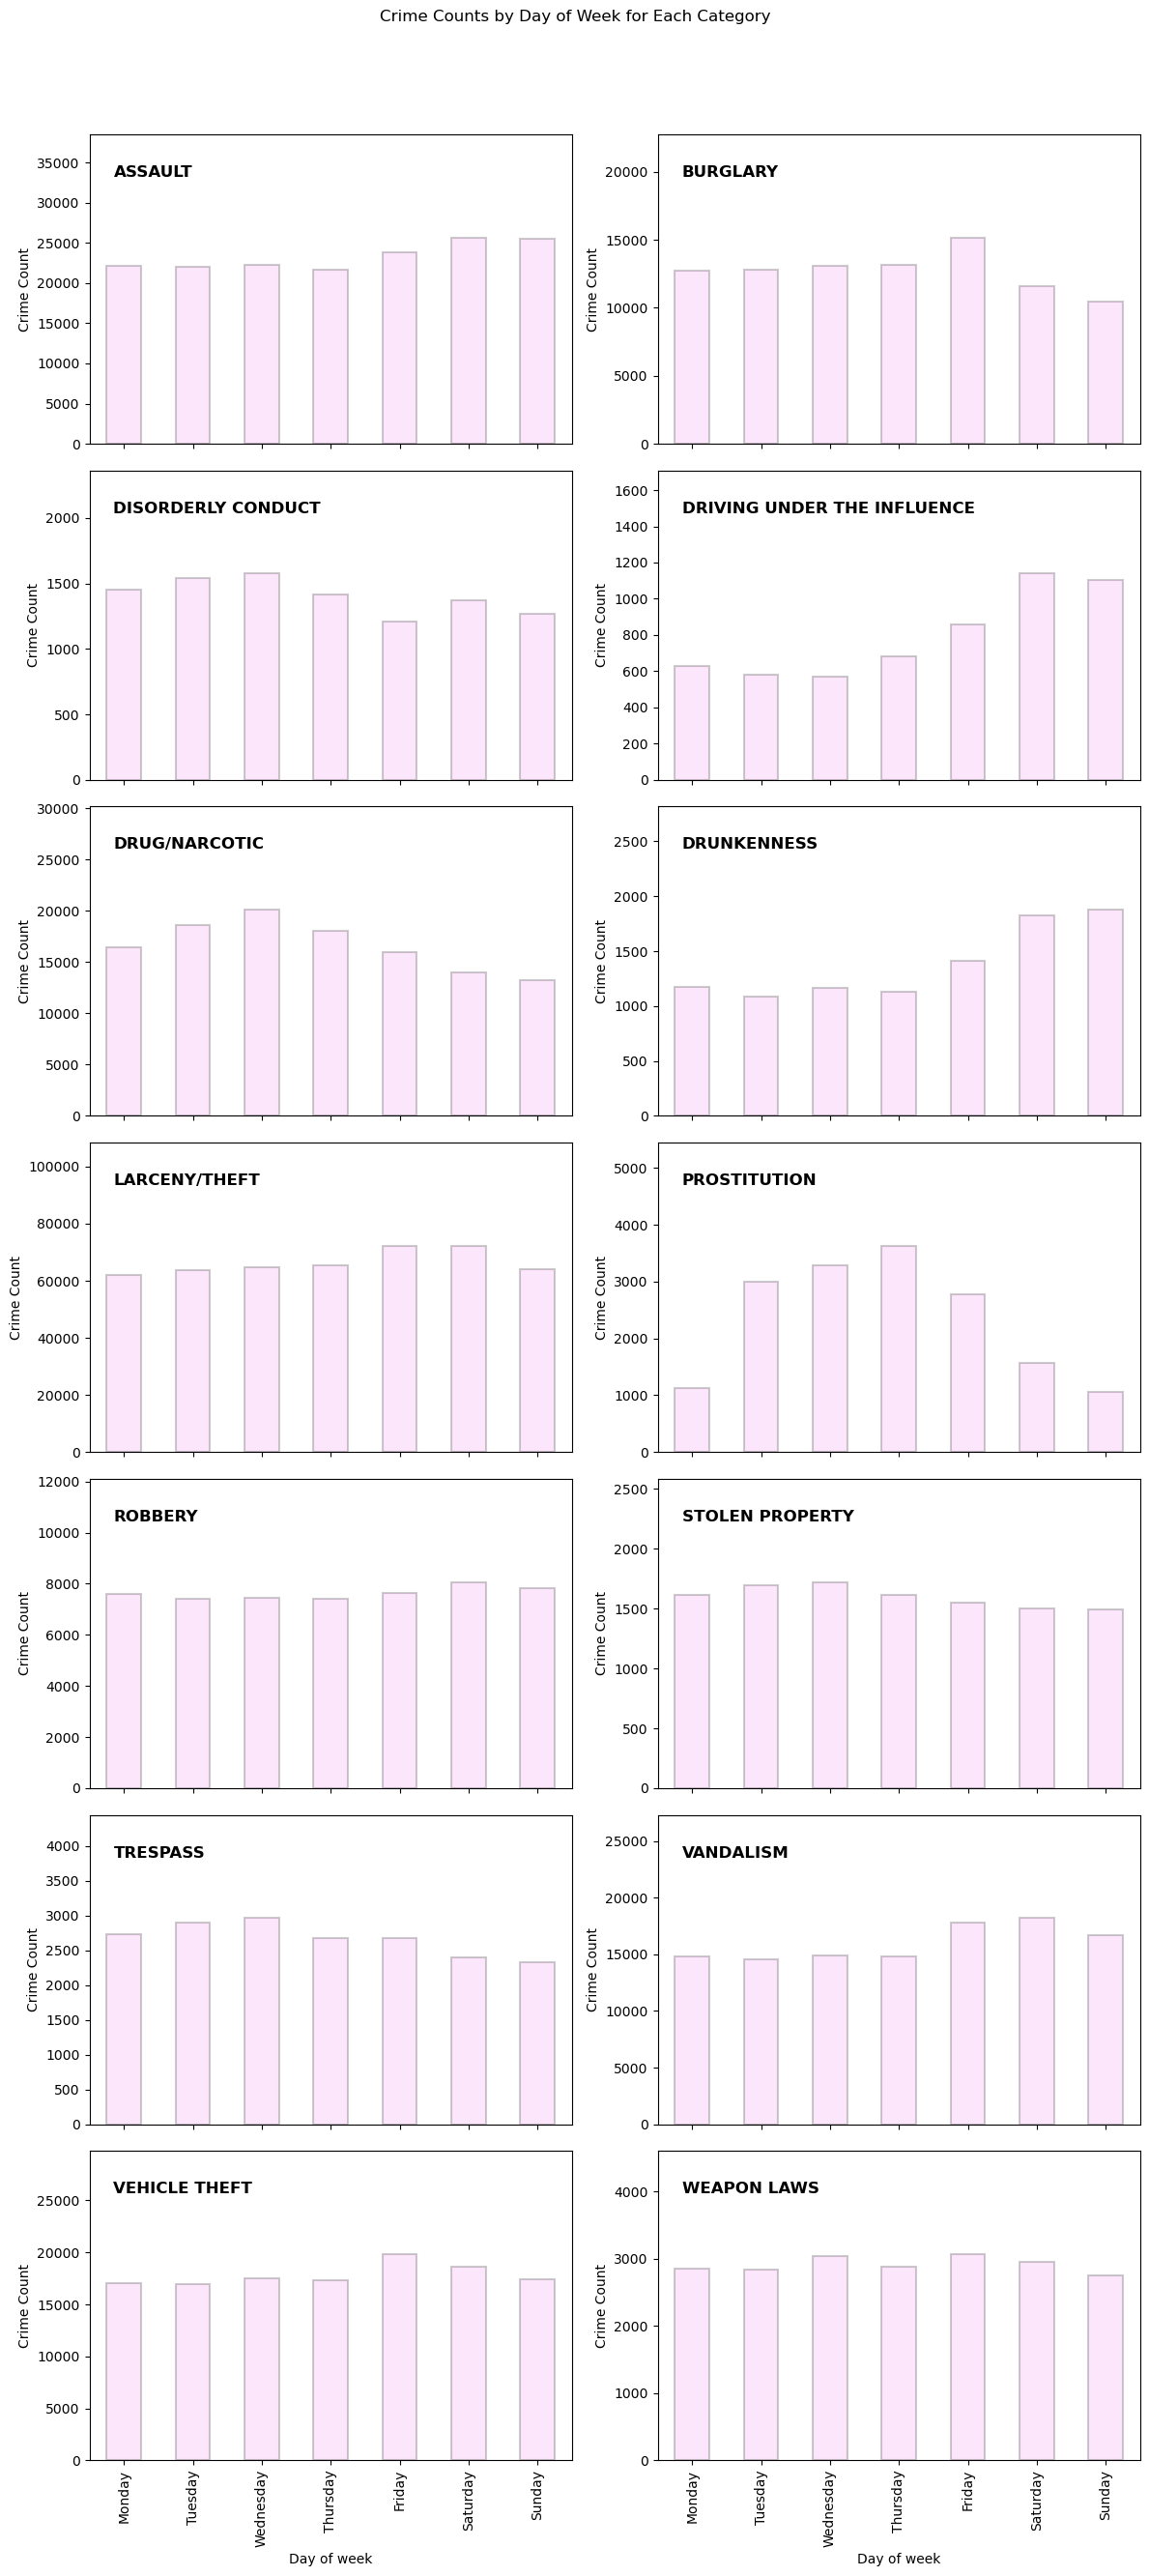

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

# read data, then filter date from 2003-2017
src_data =  pd.read_csv('/Users/green/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv')
src_data['Date'] = pd.to_datetime(src_data['Date'], format='%m/%d/%Y')
required_range_data = src_data[(src_data['Date'] >= '2003-01-01') & (src_data['Date'] <= '2017-12-31')]
# extract the focus-crimes only
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = required_range_data[required_range_data['Category'].isin(focuscrimes)]

# statistics
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = data['DayOfWeek'].astype(pd.CategoricalDtype(categories=days_order, ordered=True))
result = data.groupby(['Category', 'DayOfWeek']).size().unstack()

# start initializing the whole barcharts
num_subplot_rows = (len(focuscrimes) + 1) // 2
fig, axes = plt.subplots(num_subplot_rows, 2, figsize=(12, 4 * num_subplot_rows))
fig.suptitle('Crime Counts by Day of Week for Each Category')

# start initializing the sub barcharts
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]
    result.loc[category].plot(kind='bar', ax=ax, color='violet', alpha=0.2, edgecolor='black', linewidth=1.5)
    # render sub barchart
    ax.text(0.05, 0.9, category, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, 1.5 * result.loc[category].max())
    #only charts in last line show labels in x
    if i // 2 == num_subplot_rows - 1:
        ax.set_xlabel('Day of week')
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

# show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 1.1.2: the months plots

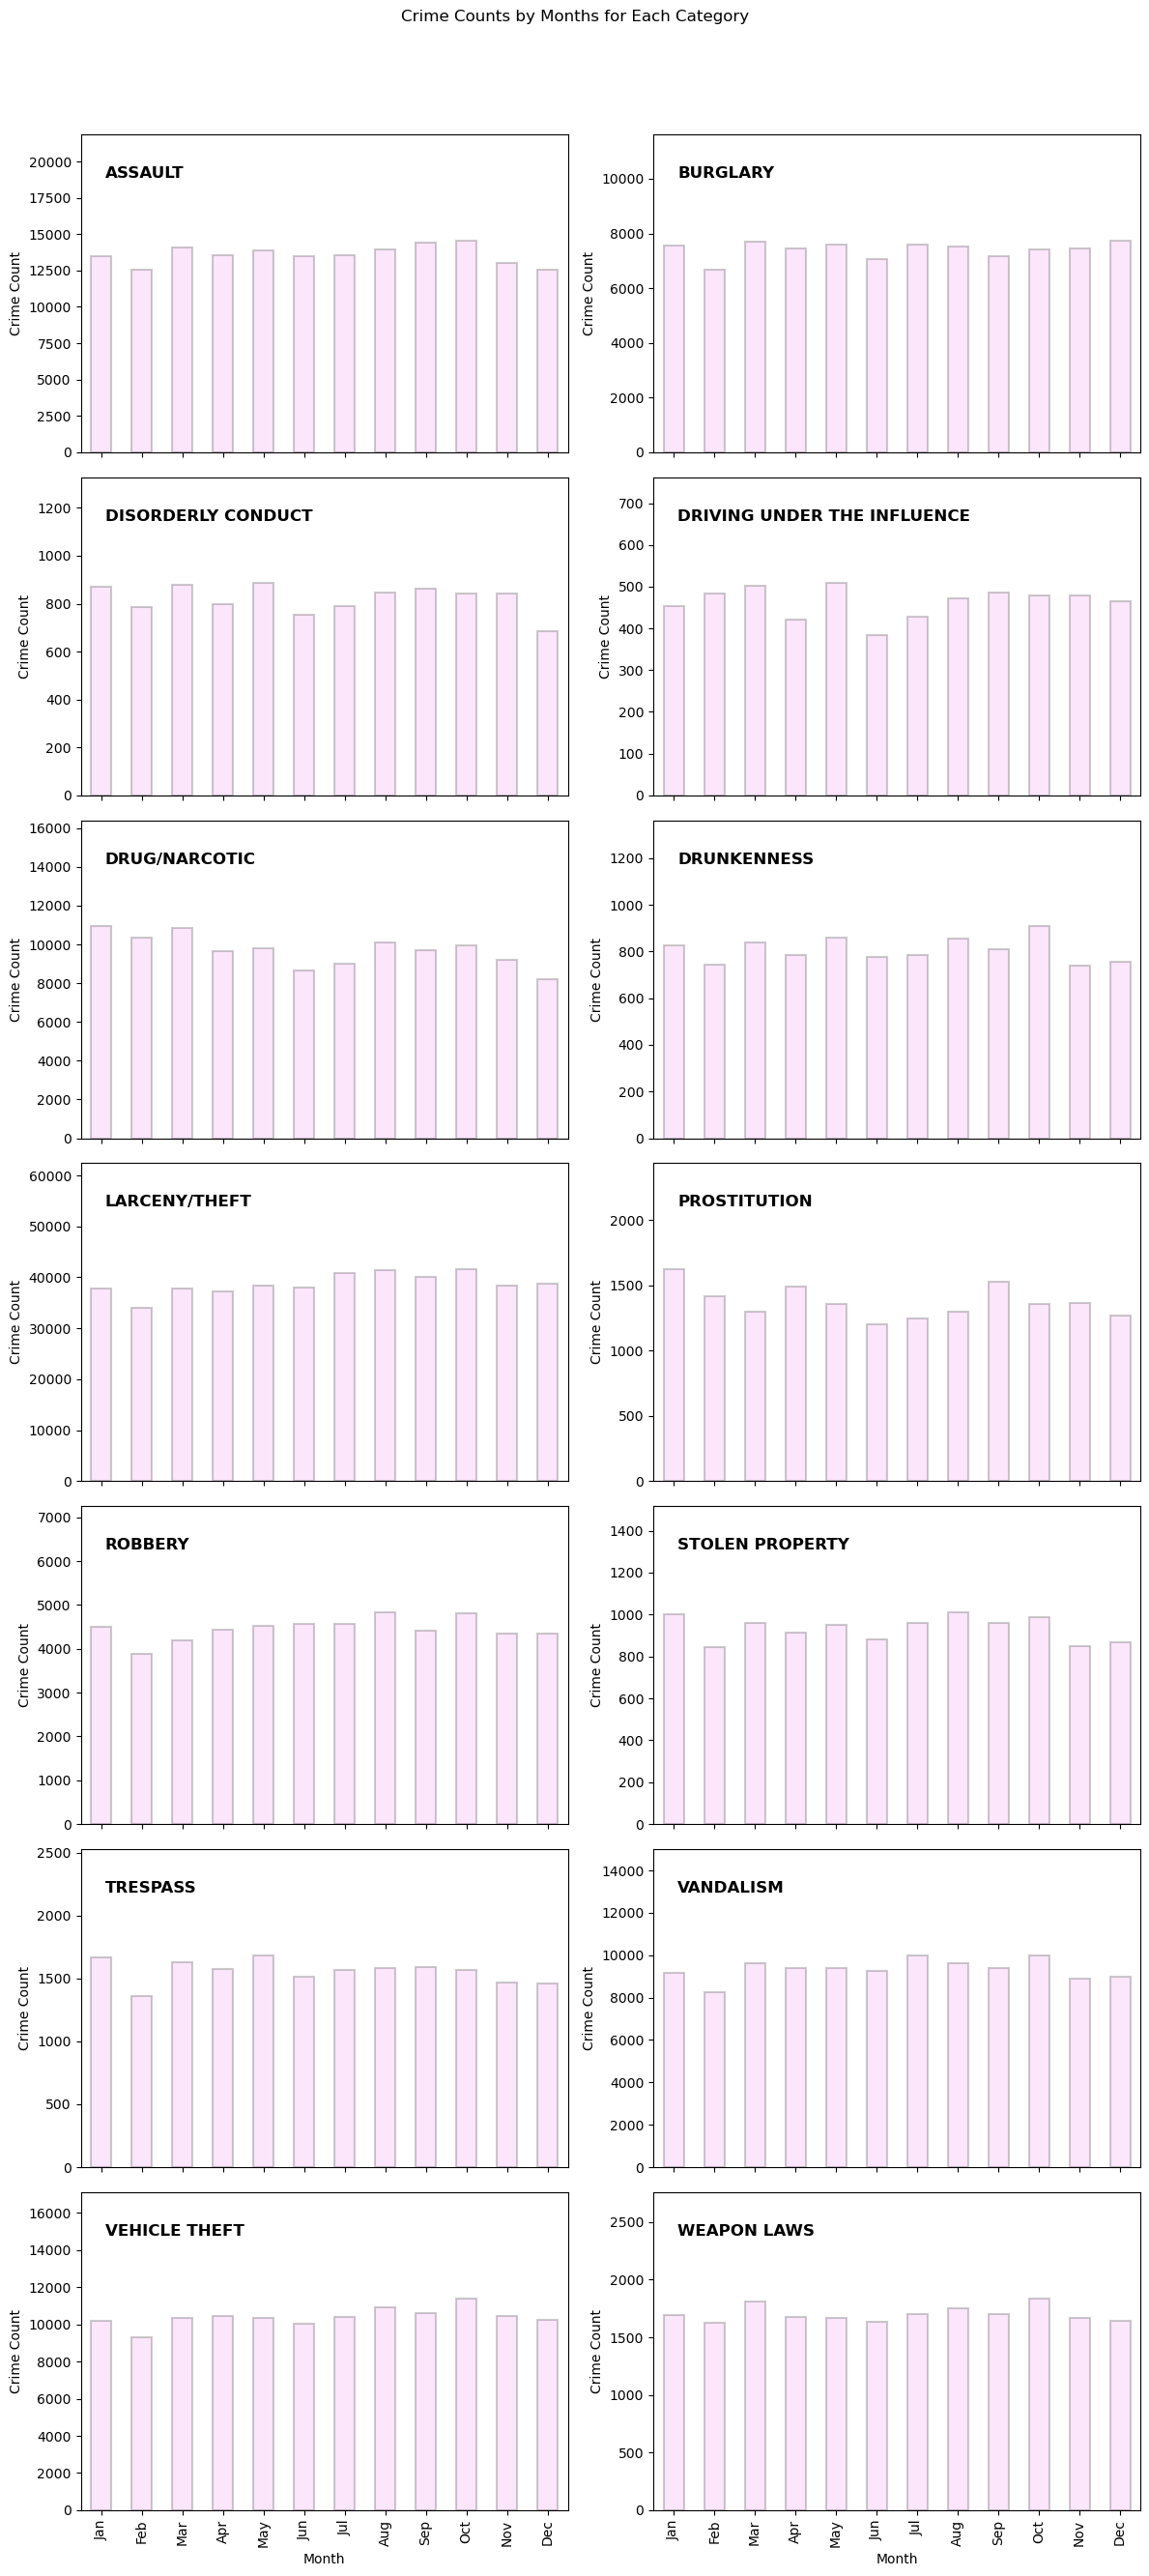

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True # used for ingoring warning

# read data, then filter date from 2003-2017
src_data =  pd.read_csv('/Users/green/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv')
src_data['Date'] = pd.to_datetime(src_data['Date'], format='%m/%d/%Y')
required_range_data = src_data[(src_data['Date'] >= '2003-01-01') & (src_data['Date'] <= '2017-12-31')]
# extract the focus-crimes only
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = required_range_data[required_range_data['Category'].isin(focuscrimes)]

# statistics
data['DateM'] = data['Date'].astype(str).str[5:7]
result = data.groupby(['Category', 'DateM']).size().unstack()

# start initializing the whole barcharts
num_subplot_rows = (len(focuscrimes) + 1) // 2
fig, axes = plt.subplots(num_subplot_rows, 2, figsize=(12, 4 * num_subplot_rows))
fig.suptitle('Crime Counts by Months for Each Category')

# start initializing the sub barcharts
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]
    result.loc[category].plot(kind='bar', ax=ax, color='violet', alpha=0.2, edgecolor='black', linewidth=1.5)
    # render sub barchart
    ax.text(0.05, 0.9, category, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, 1.5 * result.loc[category].max())
    #only charts in last line show labels in x
    if i // 2 == num_subplot_rows - 1:
        ax.set_xlabel('Month')
        ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])
# show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 1.1.3: the 24-hour cycle plots

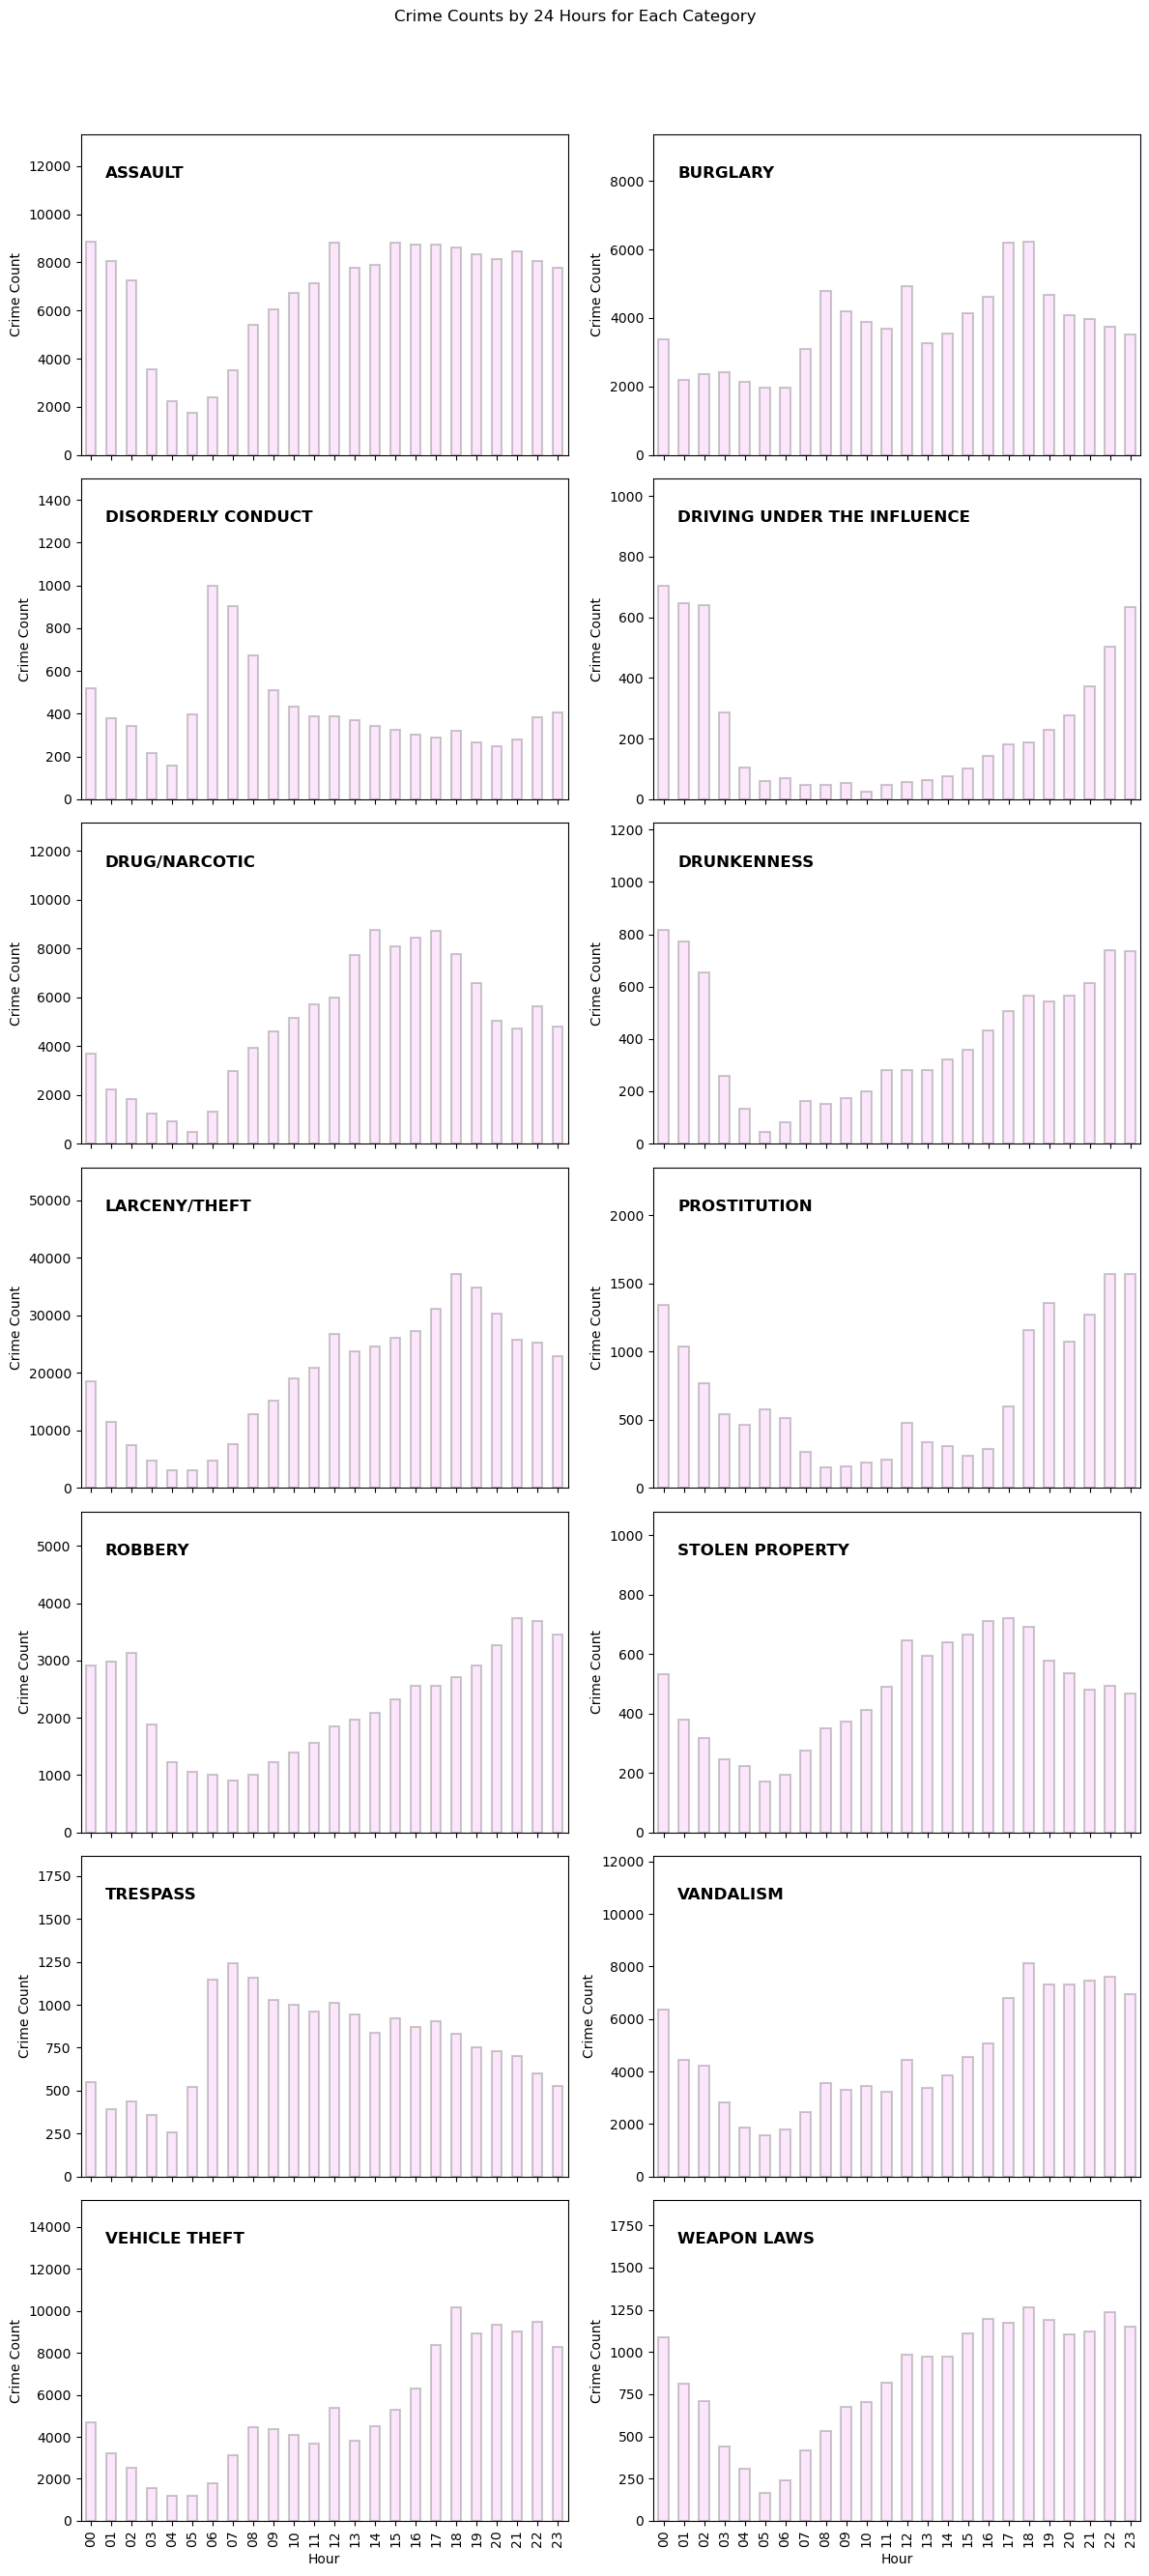

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True # used for ingoring warning

# read data, then filter date from 2003-2017
src_data =  pd.read_csv('/Users/green/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv')
src_data['Date'] = pd.to_datetime(src_data['Date'], format='%m/%d/%Y')
required_range_data = src_data[(src_data['Date'] >= '2003-01-01') & (src_data['Date'] <= '2017-12-31')]
# extract the focus-crimes only
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = required_range_data[required_range_data['Category'].isin(focuscrimes)]

# statistics
data['Hour'] = data['Time'].astype(str).str[0:2]
result = data.groupby(['Category', 'Hour']).size().unstack()

# start initializing the whole barcharts
num_subplot_rows = (len(focuscrimes) + 1) // 2
fig, axes = plt.subplots(num_subplot_rows, 2, figsize=(12, 4 * num_subplot_rows))
fig.suptitle('Crime Counts by 24 Hours for Each Category')

# start initializing the sub barcharts
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]
    result.loc[category].plot(kind='bar', ax=ax, color='violet', alpha=0.2, edgecolor='black', linewidth=1.5)
    # render sub barchart
    ax.text(0.05, 0.9, category, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, 1.5 * result.loc[category].max())
    #only charts in last line show labels in x
    if i // 2 == num_subplot_rows - 1:
        ax.set_xlabel('Hour')
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

# show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 1.1.4: the 168 hours of the week cycle plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True # used for ingoring warning

# read data, then filter date from 2003-2017
src_data =  pd.read_csv('/Users/green/Downloads/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv')
src_data['Date'] = pd.to_datetime(src_data['Date'], format='%m/%d/%Y')
required_range_data = src_data[(src_data['Date'] >= '2003-01-01') & (src_data['Date'] <= '2017-12-31')]
# extract the focus-crimes only
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = required_range_data[required_range_data['Category'].isin(focuscrimes)]

# statistics
data['Hour'] = data['Time'].astype(str).str[0:2].astype(int)
DaysNumber = {'Monday': 0, 'Tuesday': 1*24, 'Wednesday': 2*24, 'Thursday': 3*24, 'Friday': 4*24, 'Saturday': 5*24, 'Sunday': 6*24}
data['HourOfWeek'] = data['DayOfWeek'].map(DaysNumber) + data['Hour']

result = data.groupby(['Category', 'HourOfWeek']).size().unstack()

# start initializing the whole barcharts
num_subplot_rows = len(focuscrimes)
fig, axes = plt.subplots(num_subplot_rows, 1, figsize=(8, 4 * num_subplot_rows))
fig.suptitle('Crime Counts by 186 Hours of Week for Each Category')

# start initializing the sub barcharts
for i, category in enumerate(categories):
    ax = axes[i]
    result.loc[category].plot(kind='bar', ax=ax, color='violet', alpha=0.2, edgecolor='black', linewidth=1.5)
    # render sub barchart
    ax.text(0.05, 0.9, category, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, 1.5 * result.loc[category].max())
    #only charts in last line show labels in x
    if i == num_subplot_rows - 1:
        ax.set_xlabel('Hour of Week')
        ax.set_xticks(range(0, 200, 6))
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])

# show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()